<h2>D209 - Data Mining -  TASK 1: CLASSIFICATION ANALYSIS</h2>

Jonathon "Jon” Fryman<br>
Data Analytics 01/01/2022<br>
Student ID 000974544<br>
Program Mentor: Lea Yoakem<br>
C: 419-206-6989 (ET)<br>
jfryma1@wgu.edu<br>

<h3>Part I: Research Question</h3>

<h3>A.  Describe the purpose of this data mining report by doing the following:</h3>

<h3>A1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods:</h3>


Can we correctly identify which customers correctly identify themselves as Techie?

<h3>A2. Define one goal of the data analysis.</h3>

The goal of the stated research question is to identify if the customer would be likely to identify themselves as Techie. This would allow better specificity in provided service offerings to different segments of customers.
 

<h3>Part II: Method Justification</h3>

<h3>B.  Explain the reasons for your chosen prediction method from part A1 by doing the following:</h3>

<h3>B1.  Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.</h3>

<h3>B2.  Summarize one assumption of the chosen prediction method.</h3>


<i>KNN is a non-parametric algorithm and does not require any assumptions on the data distribution. This gives KNN an extra edge in specific settings where the data is highly unusual. This is the reason for KNN being the first choice when there is no prior knowledge or very little knowledge about the data distribution.</i>

<h3>B3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.</h3>

Utilized packages/libraries include:
<ul>
    <li>Pandas</li>
    <li>Numpy</li>
    <li>sklearn</li>
    <li>train_test_split</li>
    <li>sklearn.metrics - accuracy_score</li>
    <li>sklearn.metrics - mean_squared_errors</li>
    <li>sklearn.neighbors - KNeighborsClassifier</li>
    
</ul>

<h3>Part III: Data Preparation</h3>

<h3>C.  Perform data preparation for the chosen data set by doing the following:</h3>

<h3>C1.  Describe one data preprocessing goal relevant to the prediction method from part A1.</h3>

<h3>C2.  Identify the initial data set variables that you will use to perform the analysis for the prediction question from part A1, and group each variable as continuous or categorical. </h3>

<h4>All Variables</h4>
<ul>
    <li>Age</li>
    <li>Outage_sec_perweek</li>
    <li>Email</li>
    <li>Contacts</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
    <li>Churn_Yes</li>
    <li>Techie_Yes</li>
    <li>Contract_One year</li>
    <li>Contract_Two Year</li>
    <li>Port_modem_Yes</li>
    <li>Tablet_Yes</li>
    <li>InternetService_Fiber Optic</li>
    <li>InternetService_None</li>
    <li>Phone_Yes</li>
    <li>Multiple_Yes</li>
    <li>OnlineSecurity_Yes</li>
    <li>OnlineBackup_Yes</li>
    <li>DeviceProtection_Yes</li>
    <li>TechSupport_Yes</li>
    <li>StreamingTV_Yes</li>
    <li>StreamingMovies_Yes</li>
    <li>PaperlessBilling_Yes</li>
    <li>PaymentMethod_Credit Card (automatic)</li>
    <li>PaymentMethod_Electronic Check</li>
    <li>PaymentMethod_Mailed Check</li>
</ul>
<h4>Numeric</h4>
<ul>
    <li>Age</li>
    <li>Outage_sec_perweek</li>
    <li>Contacts</li>
    <li>Yearly_equip_failure</li>
    <li>Tenure</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>

<h4>Categorical</h4>
<ul>
    <li>Email</li>
    <li>Churn_Yes</li>
    <li>Techie_Yes</li>
    <li>Contract_One year</li>
    <li>Contract_Two Year</li>
    <li>Port_modem_Yes</li>
    <li>Tablet_Yes</li>
    <li>InternetService_Fiber Optic</li>
    <li>InternetService_None</li>
    <li>Phone_Yes</li>
    <li>Multiple_Yes</li>
    <li>OnlineSecurity_Yes</li>
    <li>OnlineBackup_Yes</li>
    <li>DeviceProtection_Yes</li>
    <li>TechSupport_Yes</li>
    <li>StreamingTV_Yes</li>
    <li>StreamingMovies_Yes</li>
    <li>PaperlessBilling_Yes</li>
    <li>PaymentMethod_Credit Card (automatic)</li>
    <li>PaymentMethod_Electronic Check</li>
    <li>PaymentMethod_Mailed Check</li>

</ul>

<h3>C3.  Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.</h3>

In [1]:
# importing required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as MSE, confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing churn csv as pandas dataframe
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# confirming if any values are missing or null
churn_df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [4]:
# Summary Statistics for all numerical variables contained in initial DataSet
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341827,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
# generating list of all original columns in dataframe
list(churn_df.columns)

['CaseOrder',
 'Customer_id',
 'Interaction',
 'UID',
 'City',
 'State',
 'County',
 'Zip',
 'Lat',
 'Lng',
 'Population',
 'Area',
 'TimeZone',
 'Job',
 'Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'Churn',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [6]:
# creating list of unique areas
a = churn_df['Area'].unique()

# creating empty area dictionary
ad = {}

# Creating dictionary associating area with median population
for i in a:
    ad[i] = churn_df.loc[churn_df['Area'] == i]['Population'].mean()
    
# assign mean population for area to records with 0 for population value
for key, value in ad.items():
    churn_df.loc[(churn_df['Population'] == 0) & (churn_df['Area'] == key), 'Population'] = value    

In [7]:
# summary statistics for initial DataFrame
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9851.073089,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14400.373732,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,2.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341827,-97.082812,782.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,3064.000000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
# Dropping columnsnot required for current analysis
churn_df = churn_df.drop(columns=['Customer_id','CaseOrder', 'Interaction', 'City', 'State', 'County', 'Zip', 
                      'UID', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
                      'Gender', 'Income', 'Marital',
                      'Item1', 'Item2', 'Item3', 'Item4','Item5', 'Item6', 'Item7', 'Item8'])

churn_df.head(2)

,Age,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,68,No,7.978323,10,0,1,No,One year,Yes,Yes,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,27,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766


In [9]:
# Creating dummy variables
df_dummies = pd.get_dummies(churn_df, drop_first = True)
# generating list of all columns in dummies dataframe
list(df_dummies.columns)

['Age',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Churn_Yes',
 'Techie_Yes',
 'Contract_One year',
 'Contract_Two Year',
 'Port_modem_Yes',
 'Tablet_Yes',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'Phone_Yes',
 'Multiple_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit Card (automatic)',
 'PaymentMethod_Electronic Check',
 'PaymentMethod_Mailed Check']

In [10]:
print(churn_df.keys())

Index(['Age', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')


<h3>C4.  Provide a copy of the cleaned data set.</h3>

In [11]:
# Exporting full cleaned dataframe to csv
churn_df.to_csv('churn_df.csv', index=False)

# Exporting full cleaned dataframe with dummies to csv
df_dummies.to_csv('df_dummies.csv', index=False)

<h3>Part IV.  Analysis</h3>

<h3>D.  Perform the data analysis and report on the results by doing the following:</h3>

<h3>D1.  Split the data into training and test data sets and provide the file(s).</h3>

In [12]:
# Seperating variables for training/testing
X = df_dummies[['Age',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Churn_Yes',
 'Contract_One year',
 'Contract_Two Year',
 'Port_modem_Yes',
 'Tablet_Yes',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'Phone_Yes',
 'Multiple_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit Card (automatic)',
 'PaymentMethod_Electronic Check',
 'PaymentMethod_Mailed Check']]
y = df_dummies['Techie_Yes']

In [13]:
# splitting dataset for training test ssplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [14]:
# outputting training/testing data to csv files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

<h3>D2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</h3>



In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [16]:
knn = KNN(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN

KNeighborsClassifier()

In [17]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.81


<h3>D3.  Provide the code used to perform the prediction analysis from part D2.</h3>

In [18]:
# Setting the seed
SEED = 24

In [19]:
# Instantiate KNN
knn = KNN(n_neighbors=27)

param_grid = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid)

In [20]:
knn.fit(X_train, y_train)
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=27),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [21]:
# using gridsearchcv to review models best_params_
knn_cv.best_params_

{'n_neighbors': 22}

In [22]:
# using gridsearchcv to review models best_score_
knn_cv.best_score_

0.8324285714285715

In [23]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

In [24]:
print("Test set predictions: {}".format(y_pred))

Test set predictions: [0 0 0 ... 0 0 0]


In [25]:
knn.score(X_test, y_test)

0.832

In [26]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2496    0]
 [ 504    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2496
           1       0.00      0.00      0.00       504

    accuracy                           0.83      3000
   macro avg       0.42      0.50      0.45      3000
weighted avg       0.69      0.83      0.76      3000



/Users/jonathonfryman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathonfryman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathonfryman/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

NameError: name 'neighbors' is not defined

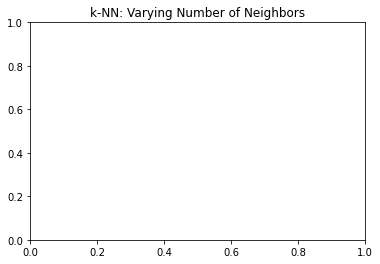

In [27]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# evaluate test sets rmse 
rmse_test = MSE(y_test, y_pred)**(1/2)

# print test set RMSE score
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

<h3>Part V: Data Summary and Implications</h3>

<h3>E.  Summarize your data analysis by doing the following:</h3>

<h3>E1. Explain the accuracy and the area under the curve (AUC) of your classification model.</h3>

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNN(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Calculating roc_auc_score for KNN model
roc_auc_score(y_test, y_pred_prob)

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Cross validation score for KNN model
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

<h3>E2.  Discuss the results and implications of your prediction analysis.</h3>

<h3>E3.  Discuss one limitation of your data analysis.</h3>

The data does not include enough context to outline why the customer felt justified in identifying themselves as 'Techie'.

<h3>E4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</h3>

<h3>Part VI: Demonstration</h3>

<h3>F: PANOPTO</h3>

<h3>G: WEB SOURCES</h3>
<ul>
    <li></li>
</ul>

<h3>H: SOURCES</h3>
<ul>
    <li>Harrison, O. (2019, July 14). Machine learning basics with the K-nearest neighbors algorithm. Medium. Retrieved July 5, 2022, from https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 </li>
    <li>Sakshi Gupta. (2022, June 15). Knn Machine Learning Algorithm explained. Springboard Blog. Retrieved July 5, 2022, from https://www.springboard.com/blog/data-science/knn-algorithm/ </li>
    <li></li>
</ul>

<h3></h3>

<h3></h3>

<h3></h3>

<h3></h3>